In [ ]:
# !mkdir DataFloorPlans500
# %cd DataFloorPlans500
# !curl -L "https://universe.roboflow.com/ds/lCQx5TrSWJ?key=9lj2naKRy0" &gt; roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# %cd ..


In [38]:
# # !git clone https://github.com/gesstalt/ROBIN
# %cd ROBIN
# !unzip ROBIN.zip
# %cd ..


In [3]:
!pip3 install ultralytics
!pip3 install matplotlib
!pip install albumentations
!pip install torchsummary



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 5.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 8.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 6.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 6.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4
  Attempting uninstall: scipy


# First Train

In [1]:
# https://universe.roboflow.com/university-y9nbi/floor-plans-500/dataset/3
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')
# model = YOLO('/notebooks/SeaObjDet/Navier/runs/detect/train8/weights/last.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='DataFloorPlans500/data.yaml', epochs=600)


# First Test

In [1]:
import os
import cv2
import glob
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from matplotlib import pyplot as plt
model = YOLO('runs/detect/train2/weights/best.pt')


In [2]:
color_map = {
    0: (0, 255, 0),     # Green
    1: (255, 0, 0),     # Red
    2: (0, 0, 255),     # Blue
}

def plot_result(result, fig_fp=None):
    # Load image
    image = result.orig_img.copy()

    # Extract names
    names = result.names
    
    # Iterate through detected masks 
    for name_id, box in zip(result.boxes.cls, result.boxes.xywh):
        # class name
        name_id = name_id.cpu().item()
        name = names[name_id]
        
        if name == "door":
            # Draw bounding box
            buffer = 5
            color = color_map[name_id]
            x, y, w, h = box.detach().cpu().numpy().astype(int)  # Extract box coordinates
            # x1, y1, x2, y2 = np.array([x-w/2, y-h/2, x+w/2, y+h/2]).astype(int)
            x1, y1, x2, y2 = np.array([x-w/2-buffer, y-h/2-buffer, x+w/2+buffer, y+h/2+buffer]).astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Draw name label
            label = f'{name}'  # You can add confidence if desired 
            cv2.putText(image, label, (x1, y1 - 10),  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 1) 
        
    if fig_fp is None:
        plt.imshow(image)
        plt.tight_layout()
        plt.show()
    else:
        cv2.imwrite(fig_fp, image)
    
fig_dir = os.path.join("temp", "figures_test_1st_cv")
Path(fig_dir).mkdir(parents=True, exist_ok=True)

# img_fps = glob.glob("DataFloorPlans500/test/images/*.jpg")
img_fps = glob.glob("ROBIN/ROBIN/*/*.jpg")
for img_fp in img_fps:
    result = model(img_fp)[0]
    plot_result(result, fig_fp=os.path.join(fig_dir, os.path.basename(img_fp).replace(".jpg", ".png")))


image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat36_5.jpg: 640x576 6 doors, 9 zones, 10.8ms
Speed: 4.9ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat46_10.jpg: 352x640 5 doors, 1 window, 5 zones, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat48_8.jpg: 640x640 6 doors, 6 zones, 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat40_6.jpg: 576x640 5 doors, 8 zones, 10.6ms
Speed: 2.5ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat38_4.jpg: 448x640 7 doors, 7 zones, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shap

1. [V] change the label of DataFloorPlans500 to contain only door
2. [V] add label using existing model, and manual label it


# 2nd Train

In [6]:
# https://universe.roboflow.com/university-y9nbi/floor-plans-500/dataset/3
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')
model = YOLO('runs/detect/train2/weights/best.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='ROBIN/data.yaml', epochs=100)


# 2nd Test

In [6]:
import os
import cv2
import glob
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from matplotlib import pyplot as plt
model = YOLO('runs/detect/train3/weights/best.pt')


In [7]:
color_map = {
    0: (0, 255, 0),     # Green
    1: (255, 0, 0),     # Red
    2: (0, 0, 255),     # Blue
}

def plot_result(result,fig_fp=None):
    # Load image
    image = result.orig_img.copy()

    # Extract names
    names = result.names
    
    # Iterate through detected masks 
    for name_id, box in zip(result.boxes.cls, result.boxes.xywh):
        # class name
        name_id = name_id.cpu().item()
        name = names[name_id]
        
        if name == "door":
            # Draw bounding box
            buffer = 5
            color = color_map[name_id]
            x, y, w, h = box.detach().cpu().numpy().astype(int)  # Extract box coordinates
            # x1, y1, x2, y2 = np.array([x-w/2, y-h/2, x+w/2, y+h/2]).astype(int)
            x1, y1, x2, y2 = np.array([x-w/2-buffer, y-h/2-buffer, x+w/2+buffer, y+h/2+buffer]).astype(int)
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

            # Draw name label
            label = f'{name}'  # You can add confidence if desired 
            cv2.putText(image, label, (x1, y1 - 10),  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 1) 
        
    print(image.shape)
    if fig_fp is None:
        plt.imshow(image)
        plt.tight_layout()
        plt.show()
    else:
        cv2.imwrite(fig_fp, image)

fig_dir = os.path.join("temp", "figures_test_2nd")
Path(fig_dir).mkdir(parents=True, exist_ok=True)

# img_fps = glob.glob("DataFloorPlans500/test/images/*.jpg")
img_fps = glob.glob("ROBIN/ROBIN_Door_15_Labeled/valid/images/*.jpg")
for img_fp in img_fps:
    result = model(img_fp)[0]
    plot_result(result, fig_fp=os.path.join(fig_dir, os.path.basename(img_fp).replace(".jpg", ".png")))


image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat11_8.jpg: 640x416 3 doors, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)
(1386, 839, 3)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat21_9.jpg: 352x640 6 doors, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
(1000, 1850, 3)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat48_8.jpg: 640x640 5 doors, 6.7ms
Speed: 3.3ms preprocess, 6.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
(1380, 1443, 3)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat16_6.jpg: 640x640 3 doors, 6.3ms
Speed: 2.8ms preprocess, 6.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
(1204, 1244, 3)

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat40_6.jpg: 576x640 5 doors, 7.0ms
Speed: 2

# Orientation Classification (CV For Labeling)

In [9]:
import os
import cv2
import glob
import shutil
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from collections import Counter
import matplotlib.patches as patches
from matplotlib import pyplot as plt
model = YOLO('runs/detect/train3/weights/best.pt')


In [ ]:
def clip_doors(result):
    image = cv2.cvtColor(result.orig_img.copy(), cv2.COLOR_BGR2GRAY)
    boxes = result.boxes.xywh
    
    # Iterate through detected masks 
    img_doors = []
    img_doors_boxes = []
    
    height, width = image.shape[:2]
    for box in boxes:
        # Draw bounding box
        x, y, w, h = box.detach().cpu().numpy().astype(int)
        x1, y1, x2, y2 = np.array([x-w/2, y-h/2, x+w/2, y+h/2]).astype(int)
        img_doors.append(image[y1:y2, x1:x2].copy())
        img_doors_boxes.append([x1, y1, x2, y2])
    return img_doors, img_doors_boxes

def continuous_cluster(series):
    cluster_curr = 0
    clusters = [cluster_curr]
    for i in range(1, len(series)):
        if series[i] - series[i-1] == 1:
            clusters.append(cluster_curr)
        else:
            cluster_curr += 1
            clusters.append(cluster_curr)
    return clusters

def hc_detect(img_resize, center_loc, thres=150, plot=False, figfp=None):
    """
    Return 
    --------
    True: Vertical Open
    False: Horizontal Open
    """
    # horizontal
    hline_center = img_resize[center_loc, :]
    hline_custers = continuous_cluster(np.where(hline_center < thres)[0])
    vertical_open = len(np.unique(hline_custers)) > 1
    
    # vertical
    vline_center = img_resize[:, center_loc]
    vline_custers = continuous_cluster(np.where(vline_center < thres)[0])
    horizontal_open = len(np.unique(vline_custers)) > 1
            
        
    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
        axes[0].imshow(img_resize, cmap='gray')
        axes[0].axhline(center_loc, color='red')
        axes[0].axvline(center_loc, color='blue')
        axes[0].set_title("door image")
        axes[1].plot(hline_center < thres)
        axes[1].set_title("horizontal center line (red)")
        axes[2].plot(vline_center < thres)
        axes[2].set_title("vertical center line (blue)")
        
        if figfp is None:
            plt.show()
        else:
            plt.tight_layout()
            plt.savefig(figfp)
            plt.close()
    assert (vertical_open and horizontal_open) == False, "vertical_open and horizontal_open are both True"
            
    return vertical_open

def wall_loc(img_resize, vertical=True, thres=150, plot=False, figfp=None):
    
    if vertical:
        wall_cand_idxs = np.where(img_resize[:, 1] < thres)[0]
        clusters = continuous_cluster(wall_cand_idxs)
        targert_cluster = sorted(dict(Counter(clusters)).items(), key=lambda x:x[1])[::-1][0][0]
        wall_idxs = wall_cand_idxs[np.array(clusters) == targert_cluster]
        y1, y2 = np.min(wall_idxs), np.max(wall_idxs)
        
        wall_middle = int(np.median(wall_idxs))
        hole_cand_idxs = np.where(img_resize[wall_middle, :]>thres)[0]
        clusters = continuous_cluster(hole_cand_idxs)
        targert_cluster = sorted(dict(Counter(clusters)).items(), key=lambda x:x[1])[::-1][0][0]
        hole_idxs = hole_cand_idxs[np.array(clusters) == targert_cluster]
        x1, x2 = np.min(hole_idxs), np.max(hole_idxs)
    else:
        wall_cand_idxs = np.where(img_resize[1, :] < thres)[0]
        clusters = continuous_cluster(wall_cand_idxs)
        targert_cluster = sorted(dict(Counter(clusters)).items(), key=lambda x:x[1])[::-1][0][0]
        wall_idxs = wall_cand_idxs[np.array(clusters) == targert_cluster]
        x1, x2 = np.min(wall_idxs), np.max(wall_idxs)

        wall_middle = int(np.median(wall_idxs))
        hole_cand_idxs = np.where(img_resize[:, wall_middle]>thres)[0]
        clusters = continuous_cluster(hole_cand_idxs)
        targert_cluster = sorted(dict(Counter(clusters)).items(), key=lambda x:x[1])[::-1][0][0]
        hole_idxs = hole_cand_idxs[np.array(clusters) == targert_cluster]
        y1, y2 = np.min(hole_idxs), np.max(hole_idxs)
        
    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
        axes[0].imshow(img_resize, cmap='gray')
        axes[0].add_patch(patches.Rectangle(xy=(x1, y1), width=x2-x1, height=y2-y1,
                         linewidth=2, edgecolor='blue', facecolor='none'))
        axes[0].set_title("door image")
        axes[1].plot(img_resize[:, 0] < thres)
        axes[1].set_title("Wall Location (red)")
        axes[2].set_title("Wall Middle (blue)")
        
        if vertical:
            axes[0].axvline(1, color='red')
            axes[0].axhline(wall_middle, color='blue')
            axes[2].plot(img_resize[wall_middle, :] < thres)
        else:
            axes[0].axhline(1, color='red')
            axes[0].axvline(wall_middle, color='blue')
            axes[2].plot(img_resize[:, wall_middle] < thres)
        
        if figfp is None:
            plt.show()
        else:
            plt.tight_layout()
            plt.savefig(figfp)
            plt.close()
            
        
    return x1, y1, x2, y2

# def generate_mask(box, processing_size, size_ori):
#     x1, y1, x2, y2 = box
#     door_mask = np.zeros(processing_size).astype(np.uint8)
#     cv2.rectangle(door_mask, (x1, y1), (x2, y2), (255, 255, 255), -1)
#     door_mask = cv2.resize(door_mask, size_ori)
#     return door_mask
    
def generate_door_mask(img, fig_fp_prefix=None, processing_size=(128, 128), ):
    h_ori, w_ori = img.shape[:2]
    img_resize = cv2.resize(img, processing_size)

    try:
        vertical_open = hc_detect(img_resize, center_loc=64, plot=True, figfp=fig_fp_prefix+"_hc_detect.png")
        x1, y1, x2, y2 = wall_loc(img_resize, vertical=vertical_open, plot=True, figfp=fig_fp_prefix+"_wall_loc.png")
        x1, x2 = x1 / processing_size[0], x2 / processing_size[0]
        y1, y2 = y1 / processing_size[0], y2 / processing_size[0]
        x, w = (x2 + x1) / 2, x2 - x1
        y, h = (y2 + y1) / 2, y2 - y1
        return x, y, w, h
    except:
        print("manual labeling")
        return    
    
    
    
door_img_train = os.path.join("DataDoorDirection/train/images/")
door_img_valid = os.path.join("DataDoorDirection/valid/images/")
door_txt_train = os.path.join("DataDoorDirection/train/labels/")
door_txt_valid = os.path.join("DataDoorDirection/valid/labels/")
door_img_train_error = os.path.join("DataDoorDirection/train_error/")

Path(door_img_train).mkdir(exist_ok=True, parents=True)
Path(door_img_valid).mkdir(exist_ok=True, parents=True)
Path(door_txt_train).mkdir(exist_ok=True, parents=True)
Path(door_txt_valid).mkdir(exist_ok=True, parents=True)

with open(os.path.join(door_txt_train, "classes.txt"), 'w') as f:
    f.write("door")
with open(os.path.join(door_txt_valid, "classes.txt"), 'w') as f:
    f.write("door")  
    
fig_dir = os.path.join("temp", "figures_orientationcv")
Path(fig_dir).mkdir(exist_ok=True, parents=True)

np.random.seed(2024)
img_fps = glob.glob("ROBIN/ROBIN_Door_15_Labeled/valid/images/*.jpg")
for img_fp in img_fps[:]:
    print("img_fp_src", img_fp)
    result = model(img_fp)[0]
    img_doors, img_doors_boxes = clip_doors(result)
    for door_idx, img_door in enumerate(img_doors):
        fig_fn_prefix = os.path.basename(img_fp).replace(".jpg", "") + "_" + str(door_idx).zfill(2) 
        fig_fp_prefix = os.path.join(fig_dir, fig_fn_prefix)
        box = generate_door_mask(img_door, fig_fp_prefix)        

        if np.random.rand() > 0.3:
            door_img_dir_curr = door_img_train
            door_txt_dir_curr = door_txt_train
        else:
            door_img_dir_curr = door_img_valid
            door_txt_dir_curr = door_txt_valid
        
        if box is not None:
            x, y, w, h = box

            filename = os.path.basename(img_fp).replace(".jpg", "") + "_" + str(door_idx).zfill(2)
            img_save_fp = os.path.join(door_img_dir_curr, filename+".jpg")
            txt_save_fp = os.path.join(door_txt_dir_curr, filename+".txt")

            cv2.imwrite(img_save_fp, img_door)
            with open(txt_save_fp, 'w') as f:
                f.write("0 %.4f %.4f %.4f %.4f\n"%(x, y, w, h))
        else:
            filename = os.path.basename(img_fp).replace(".jpg", "") + "_" + str(door_idx).zfill(2)
            img_save_fp = os.path.join(door_img_dir_curr, filename+".jpg")
            with open("orientationcv.log", "a") as f:
                f.write(img_save_fp + "\n")
            cv2.imwrite(img_save_fp, img_door)
            


img_fp_src ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat11_8.jpg

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat11_8.jpg: 640x416 3 doors, 9.6ms
Speed: 18.4ms preprocess, 9.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 416)
img_fp_src ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat21_9.jpg

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat21_9.jpg: 352x640 6 doors, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
img_fp_src ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat48_8.jpg

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat48_8.jpg: 640x640 5 doors, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
img_fp_src ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat16_6.jpg

image 1/1 /notebooks/FloorPlan/ROBIN/ROBIN_Door_15_Labeled/valid/images/Cat16_6.jpg: 640x640 3 doors, 6.8ms
Speed: 2.4ms prepro

In [1]:
!tar -cvzf DataDoorDirection.tar.gz DataDoorDirection

DataDoorDirection/
DataDoorDirection/train/
DataDoorDirection/train/labels/
DataDoorDirection/train/labels/Cat8_1_01.txt
DataDoorDirection/train/labels/Cat35_2_04.txt
DataDoorDirection/train/labels/Cat24_4_04.txt
DataDoorDirection/train/labels/Cat35_2_05.txt
DataDoorDirection/train/labels/Cat48_1_02.txt
DataDoorDirection/train/labels/Cat24_7_01.txt
DataDoorDirection/train/labels/Cat48_8_03.txt
DataDoorDirection/train/labels/Cat40_4_05.txt
DataDoorDirection/train/labels/Cat37_1_01.txt
DataDoorDirection/train/labels/Cat35_7_02.txt
DataDoorDirection/train/labels/Cat47_4_00.txt
DataDoorDirection/train/labels/Cat24_2_01.txt
DataDoorDirection/train/labels/Cat25_5_01.txt
DataDoorDirection/train/labels/Cat11_2_02.txt
DataDoorDirection/train/labels/Cat33_6_02.txt
DataDoorDirection/train/labels/Cat15_8_01.txt
DataDoorDirection/train/labels/Cat13_8_01.txt
DataDoorDirection/train/labels/Cat21_7_02.txt
DataDoorDirection/train/labels/Cat37_6_02.txt
DataDoorDirection/train/labels/Cat2_2_00.txt
DataDo

# Orientation Segmentation
Training: please see DoorOrientationSegmentation for detail

In [12]:
import os
import cv2
import glob
import shutil
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from collections import Counter
import matplotlib.patches as patches
from matplotlib import pyplot as plt
model_yolo = YOLO('runs/detect/train3/weights/best.pt')

import torch
import numpy as np
from DoorOrientationSegmentation import predict
model = torch.jit.load("DoorOrientationSegmentation/weights/best.pt")


img_fp_src ROBIN/ROBIN/Dataset_5rooms/Cat36_5.jpg

image 1/1 /notebooks/AccessControlPlanForFloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat36_5.jpg: 640x576 6 doors, 8.3ms
Speed: 9.3ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


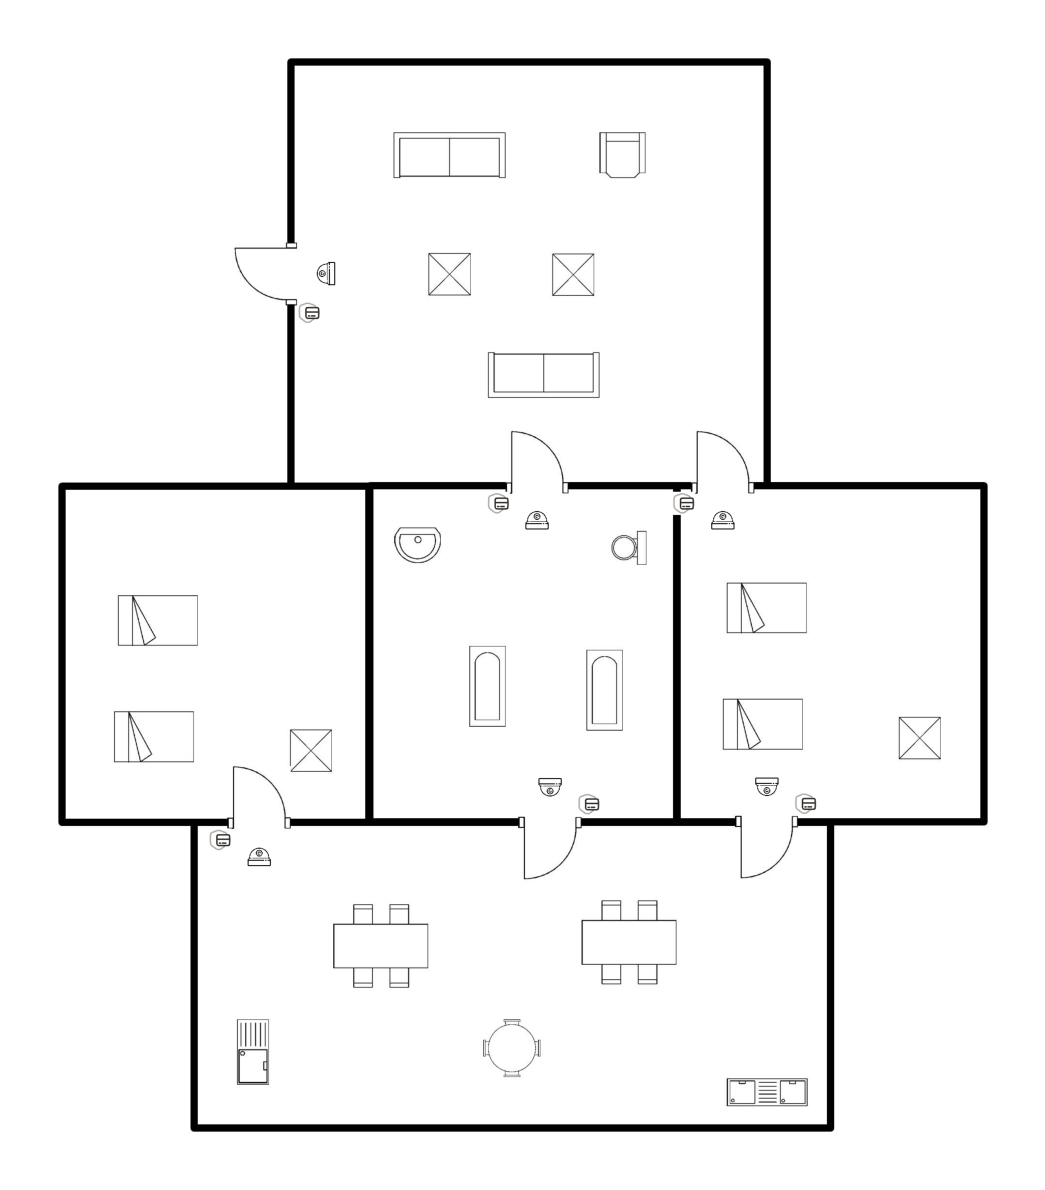

img_fp_src ROBIN/ROBIN/Dataset_5rooms/Cat46_10.jpg

image 1/1 /notebooks/AccessControlPlanForFloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat46_10.jpg: 352x640 5 doors, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


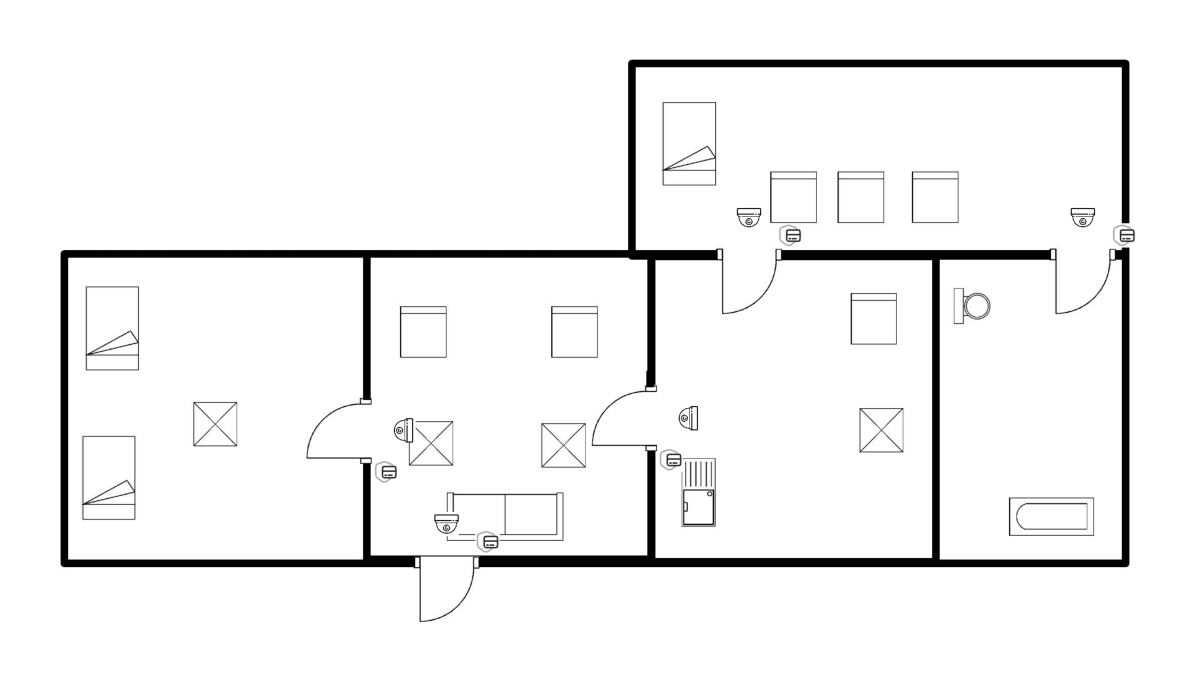

img_fp_src ROBIN/ROBIN/Dataset_5rooms/Cat48_8.jpg

image 1/1 /notebooks/AccessControlPlanForFloorPlan/ROBIN/ROBIN/Dataset_5rooms/Cat48_8.jpg: 640x640 5 doors, 7.0ms
Speed: 2.6ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


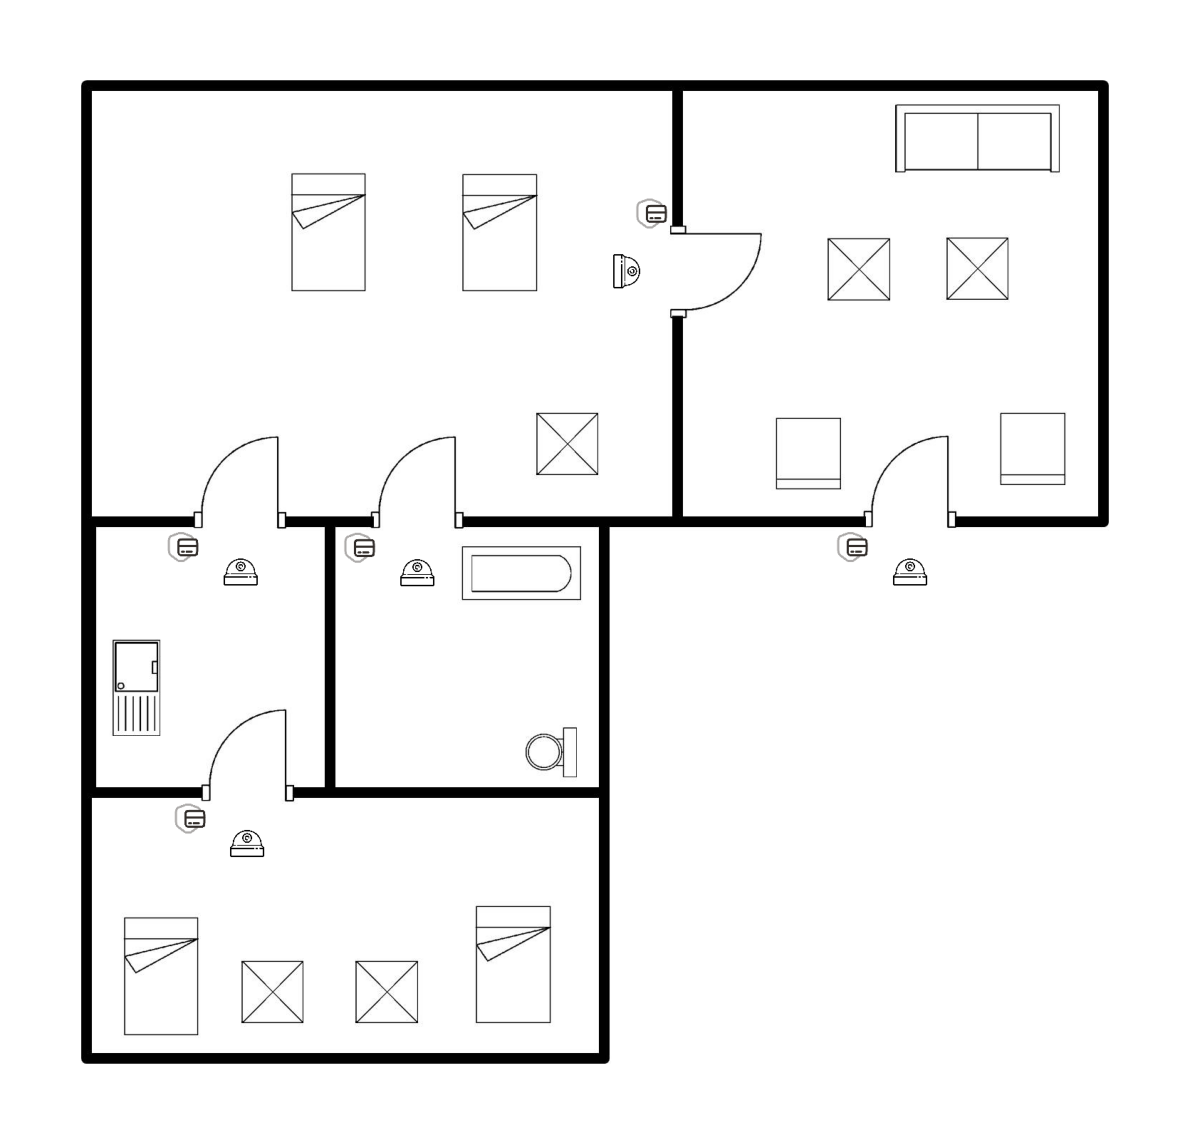

In [47]:
def clip_doors(result):
    image = cv2.cvtColor(result.orig_img.copy(), cv2.COLOR_BGR2GRAY)
    boxes = result.boxes.xywh
    
    # Iterate through detected masks 
    img_doors = []
    img_doors_boxes = []
    
    height, width = image.shape[:2]
    for box in boxes:
        # Draw bounding box
        x, y, w, h = box.detach().cpu().numpy().astype(int)
        x1, y1, x2, y2 = np.array([x-w/2, y-h/2, x+w/2, y+h/2]).astype(int)
        img_doors.append(image[y1:y2, x1:x2].copy())
        img_doors_boxes.append([x1, y1, x2, y2])
    return img_doors, img_doors_boxes


# class FloorPlanAccessControlPlanner()
pad = 100
card_img = cv2.imread("static/security-card-svgrepo-com.jpg") # cv2.cvtColor(, cv2.COLOR_BGR2GRAY)
card_offset = 5
card_img_size = 48
card_img = cv2.resize(card_img, (card_img_size, card_img_size))

cctv_img = cv2.imread("static/cctv-svgrepo-com.jpg") # cv2.cvtColor(, cv2.COLOR_BGR2GRAY)
cctv_offset = 40
cctv_img_size = 48
cctv_img = cv2.resize(cctv_img, (cctv_img_size, cctv_img_size))

np.random.seed(2024)
prediction_results_dir = os.path.join("temp", "final_predictions")
Path(prediction_results_dir).mkdir(exist_ok=True, parents=True)
img_fps = glob.glob("ROBIN/ROBIN/*/*.jpg")
# img_fps = glob.glob("ROBIN/ROBIN_Door_15_Labeled/valid/images/*.jpg")

for img_fp in img_fps[:3]:
    print("img_fp_src", img_fp)
    result = model_yolo(img_fp)[0]
    floorplan_img = result.orig_img.copy()
    floorplan_img = np.pad(floorplan_img, ((pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=255)
    
    img_doors, img_doors_boxes = clip_doors(result)
    masks, boxes = predict(model, img_doors)

    for img_door, img_door_box, mask, box in zip(img_doors, img_doors_boxes, masks, boxes):
        imgx1, imgy1, imgx2, imgy2 = img_door_box
        x1, y1, x2, y2 = box
        door_width = x2 - x1
        door_height = y2 - y1
        door_orientation = 'vertical' if door_height > door_width else "horizontal"

        cctv_img_copy = cctv_img.copy()
        if door_orientation == 'vertical':
            door_alignment = 'left' if ((x2 + x1) / 2) < (mask.shape[1]/2) else "right"
            if door_alignment == 'left':
                card_loc = imgx1+pad+x1-card_offset-card_img_size, imgy1+pad+y1-card_offset-card_img_size
                cctv_loc = imgx1+pad+x1-cctv_offset-cctv_img_size, imgy1+pad+(y1+y2)/2-cctv_img_size/2
                cctv_img_copy = np.rot90(cctv_img_copy)
            else:
                card_loc = imgx1+pad+x2+card_offset, imgy1+pad+y2+card_offset
                cctv_loc = imgx1+pad+x2+cctv_offset, imgy1+pad+(y1+y2)/2-cctv_img_size/2
                cctv_img_copy = np.fliplr(np.rot90(cctv_img_copy))
        else:
            door_alignment = 'top' if ((y2 + y1) / 2) < (mask.shape[0]/2) else "bottom"
            if door_alignment == 'top':
                card_loc = imgx1+pad+x2+card_offset, imgy1+pad+y1-card_offset-card_img_size
                cctv_loc = imgx1+pad+(x1+x2)/2-cctv_img_size/2, imgy1+pad+y1-cctv_offset-cctv_img_size
            else:
                card_loc = imgx1+pad+x1-card_offset-card_img_size, imgy1+pad+y2+card_offset
                cctv_loc = imgx1+pad+(x1+x2)/2-cctv_img_size/2, imgy1+pad+y2+cctv_offset
                cctv_img_copy = np.flipud(cctv_img_copy)

        card_rowst, card_rowend = int(card_loc[1]), int(card_loc[1]+card_img_size)
        card_colst, card_colend = int(card_loc[0]), int(card_loc[0]+card_img_size)
        floorplan_img[card_rowst: card_rowend, card_colst:card_colend] = card_img
        
        cctv_rowst, cctv_rowend = int(cctv_loc[1]), int(cctv_loc[1]+cctv_img_size)
        cctv_colst, cctv_colend = int(cctv_loc[0]), int(cctv_loc[0]+cctv_img_size)
        floorplan_img[cctv_rowst: cctv_rowend, cctv_colst:cctv_colend] = cctv_img_copy
        
    plt.figure(figsize=(12, 12))
    plt.imshow(floorplan_img)
    plt.axis('off')
    plt.tight_layout()
    # plt.savefig(os.path.join(prediction_results_dir, os.path.basename(img_fp)))
    # plt.close()
    plt.show()

    


In [67]:
%cd FloorPlan/temp
!tar -cvzf final_predictions.tar.gz  final_predictions
%cd ..

/notebooks/FloorPlan/temp
final_predictions/
final_predictions/Cat11_8.jpg
final_predictions/Cat21_9.jpg
final_predictions/Cat48_8.jpg
final_predictions/Cat16_6.jpg
final_predictions/Cat40_6.jpg
final_predictions/Cat13_4.jpg
final_predictions/Cat15_2.jpg
final_predictions/Cat38_4.jpg
final_predictions/Cat45_5.jpg
final_predictions/Cat2_1.jpg
final_predictions/Cat14_1.jpg
final_predictions/Cat4_5.jpg
final_predictions/Cat15_1.jpg
final_predictions/Cat31_6.jpg
final_predictions/Cat12_2.jpg
final_predictions/Cat18_2.jpg
final_predictions/Cat30_4.jpg
final_predictions/Cat23_5.jpg
final_predictions/Cat46_7.jpg
final_predictions/Cat32_5.jpg
final_predictions/Cat9_7.jpg
final_predictions/Cat51_8.jpg
final_predictions/Cat21_3.jpg
final_predictions/Cat7_7.jpg
final_predictions/Cat50_3.jpg
final_predictions/Cat50_9.jpg
final_predictions/Cat15_5.jpg
final_predictions/Cat40_1.jpg
final_predictions/Cat21_7.jpg
final_predictions/Cat46_8.jpg
final_predictions/Cat22_2.jpg
final_predictions/Cat15_8.jpg

# Packaging

In [30]:
%cd /notebooks/AccessControlPlanForFloorPlan/


/notebooks/AccessControlPlanForFloorPlan


In [78]:
%cd /notebooks/AccessControlPlanForFloorPlan/
# !mkdir -p "AccessControlPlanForFloorPlan"
# !mkdir -p "AccessControlPlanForFloorPlan/data"
# !mkdir -p "AccessControlPlanForFloorPlan/static"
# !mkdir -p "AccessControlPlanForFloorPlan/weights"
# !mkdir -p "AccessControlPlanForFloorPlan/DoorOrientationSegmentation"

# !cp ROBIN/ROBIN/Dataset_3rooms/Cat13_1.jpg AccessControlPlanForFloorPlan/data/Cat13_1.jpg
# !cp ROBIN/ROBIN/Dataset_4rooms/Cat32_9.jpg AccessControlPlanForFloorPlan/data/Cat32_9.jpg
# !cp ROBIN/ROBIN/Dataset_5rooms/Cat46_2.jpg AccessControlPlanForFloorPlan/data/Cat46_2.jpg
# !cp "static/cctv-svgrepo-com.jpg" "AccessControlPlanForFloorPlan/static/cctv-svgrepo-com.jpg" 
# !cp "static/security-card-svgrepo-com.jpg" "AccessControlPlanForFloorPlan/static/security-card-svgrepo-com.jpg" 
# !cp runs/detect/train3/weights/best.pt AccessControlPlanForFloorPlan/weights/yolo_best.pt
# !cp DoorOrientationSegmentation/weights/best_cpu.pt AccessControlPlanForFloorPlan/weights/unet_best_cpu.pt
# !cp DoorOrientationSegmentation/weights/best_cuda.pt AccessControlPlanForFloorPlan/weights/unet_best_cuda.pt
# !cp DoorOrientationSegmentation/predict.py AccessControlPlanForFloorPlan/DoorOrientationSegmentation/predict.py
# !cp DoorOrientationSegmentation/Transforms.py AccessControlPlanForFloorPlan/DoorOrientationSegmentation/Transforms.py
# !cp requirements.txt AccessControlPlanForFloorPlan/requirements.txt

# !touch AccessControlPlanForFloorPlan/app.py


/notebooks/AccessControlPlanForFloorPlan


In [114]:
%%writefile AccessControlPlanForFloorPlan/app.py
import os
import cv2
import glob
import torch
import shutil
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from collections import Counter
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from DoorOrientationSegmentation.predict import predict as unet_predict

class FloorPlanAccessControlPlanner():
    def __init__(self, device='cpu'):
        self.device = device
        self.model_yolo = YOLO('weights/yolo_best.pt')
        if device == 'cpu':
            self.model_unet = torch.jit.load("weights/unet_best_cpu.pt")
        else:
            self.model_unet = torch.jit.load("weights/unet_best_cuda.pt")
        
        self.pad = 100
        self.card_img = cv2.imread("static/security-card-svgrepo-com.jpg") # cv2.cvtColor(, cv2.COLOR_BGR2GRAY)
        self.card_offset = 5
        self.card_img_size = 48
        self.card_img = cv2.resize(self.card_img, (self.card_img_size, self.card_img_size))

        self.cctv_img = cv2.imread("static/cctv-svgrepo-com.jpg") # cv2.cvtColor(, cv2.COLOR_BGR2GRAY)
        self.cctv_offset = 40
        self.cctv_img_size = 48
        self.cctv_img = cv2.resize(self.cctv_img, (self.cctv_img_size, self.cctv_img_size))
        
    def clip_doors(self, result):
        image = cv2.cvtColor(result.orig_img.copy(), cv2.COLOR_BGR2GRAY)
        boxes = result.boxes.xywh

        # Iterate through detected masks 
        img_doors = []
        img_doors_boxes = []

        height, width = image.shape[:2]
        for box in boxes:
            # Draw bounding box
            x, y, w, h = box.detach().cpu().numpy().astype(int)
            x1, y1, x2, y2 = np.array([x-w/2, y-h/2, x+w/2, y+h/2]).astype(int)
            img_doors.append(image[y1:y2, x1:x2].copy())
            img_doors_boxes.append([x1, y1, x2, y2])
        return img_doors, img_doors_boxes
        
    def plan(self, img_fp_src, img_fp_dst):
        result = self.model_yolo(img_fp_src)[0]
        floorplan_img = result.orig_img.copy()
        floorplan_img = np.pad(floorplan_img, ((self.pad, self.pad), (self.pad, self.pad), (0, 0)), 'constant', constant_values=255)

        img_doors, img_doors_boxes = self.clip_doors(result)
        masks, boxes = unet_predict(self.model_unet, img_doors, self.device)

        for img_door, img_door_box, mask, box in zip(img_doors, img_doors_boxes, masks, boxes):
            imgx1, imgy1, imgx2, imgy2 = img_door_box
            x1, y1, x2, y2 = box
            door_width = x2 - x1
            door_height = y2 - y1
            door_orientation = 'vertical' if door_height > door_width else "horizontal"
            
            cctv_img_copy = self.cctv_img.copy()
            if door_orientation == 'vertical':
                door_alignment = 'left' if ((x2 + x1) / 2) < (mask.shape[1]/2) else "right"
                if door_alignment == 'left':
                    card_loc = imgx1+self.pad+x1-self.card_offset-self.card_img_size, imgy1+self.pad+y1-self.card_offset-self.card_img_size
                    cctv_loc = imgx1+self.pad+x1-self.cctv_offset-self.cctv_img_size, imgy1+self.pad+(y1+y2)/2-self.cctv_img_size/2
                    cctv_img_copy = np.rot90(cctv_img_copy)
                else:
                    card_loc = imgx1+self.pad+x2+self.card_offset, imgy1+self.pad+y2+self.card_offset
                    cctv_loc = imgx1+self.pad+x2+self.cctv_offset, imgy1+self.pad+(y1+y2)/2-self.cctv_img_size/2
                    cctv_img_copy = np.fliplr(np.rot90(cctv_img_copy))
            else:
                door_alignment = 'top' if ((y2 + y1) / 2) < (mask.shape[0]/2) else "bottom"
                if door_alignment == 'top':
                    card_loc = imgx1+self.pad+x2+self.card_offset, imgy1+self.pad+y1-self.card_offset-self.card_img_size
                    cctv_loc = imgx1+self.pad+(x1+x2)/2-self.cctv_img_size/2, imgy1+self.pad+y1-self.cctv_offset-self.cctv_img_size
                else:
                    card_loc = imgx1+self.pad+x1-self.card_offset-self.card_img_size, imgy1+self.pad+y2+self.card_offset
                    cctv_loc = imgx1+self.pad+(x1+x2)/2-self.cctv_img_size/2, imgy1+self.pad+y2+self.cctv_offset
                    cctv_img_copy = np.flipud(cctv_img_copy)

            card_rowst, card_rowend = int(card_loc[1]), int(card_loc[1]+self.card_img_size)
            card_colst, card_colend = int(card_loc[0]), int(card_loc[0]+self.card_img_size)
            floorplan_img[card_rowst: card_rowend, card_colst:card_colend] = self.card_img

            cctv_rowst, cctv_rowend = int(cctv_loc[1]), int(cctv_loc[1]+self.cctv_img_size)
            cctv_colst, cctv_colend = int(cctv_loc[0]), int(cctv_loc[0]+self.cctv_img_size)
            floorplan_img[cctv_rowst: cctv_rowend, cctv_colst:cctv_colend] = cctv_img_copy

        Path(os.path.dirname(img_fp_dst)).mkdir(parents=True, exist_ok=True)
        cv2.imwrite(img_fp_dst, floorplan_img)
        print("prediction file has been written in to", img_fp_dst)
        
if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument('device', type=str, help='{"cpu", "cuda"}')
    parser.add_argument('--img_fp_src', type=str, help='the filepath of the floor plan image')
    args = parser.parse_args()
    
    FPAC_planner = FloorPlanAccessControlPlanner(args.device)
    if args.img_fp_src is None:
        FPAC_planner.plan("data/Cat13_1.jpg", "temp/Cat13_1_pred.jpg")
        FPAC_planner.plan("data/Cat32_9.jpg", "temp/Cat32_9_pred.jpg")
        FPAC_planner.plan("data/Cat46_2.jpg", "temp/Cat46_2_pred.jpg")
    else:
        fn = os.path.basename(args.img_fp_src)
        fn = ".".join(fn.split(".")[:-1]) + "_pred.jpg"
        FPAC_planner.plan(args.img_fp_src, os.path.join("temp", fn))
        


Overwriting AccessControlPlanForFloorPlan/app.py


In [115]:
%%writefile AccessControlPlanForFloorPlan/README.md
## Introduction
This application can help recognize the location of each doors in the floor plan.


## Installation
1. Python Version: Python3.9 and Python3.11 has beem tested. All functions in the application are generally-used functions. Once all libraries are installed properly, you should be able to run the application.
2. packages instllation:
    ```
    # (optional) run in the virtual environment
    virtualenv venv
    source venv/bin/activate

    # install the dependencies
    pip install -r requirements.txt
    ```

## Usage
1. Existing Script
    1. CPU
        ```
        python3 app.py cpu
        ```

    2. GPU
        ```
        python3 app.py cuda
        ```

2. Test on your own data
    1. CPU
        ```
        python3 app.py cpu --img_fp_src <img_fp_src>
        ```

    2. GPU
        ```
        python3 app.py cuda --img_fp_src <img_fp_src>
        ```
    

Overwriting AccessControlPlanForFloorPlan/README.md


In [116]:
%cd /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan
!python3 app.py cuda
%cd /notebooks/AccessControlPlanForFloorPlan/


/notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan

image 1/1 /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan/data/Cat13_1.jpg: 384x640 3 doors, 12.0ms
Speed: 4.0ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
prediction file has been written in to temp/Cat13_1_pred.jpg

image 1/1 /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan/data/Cat32_9.jpg: 544x640 4 doors, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)
prediction file has been written in to temp/Cat32_9_pred.jpg

image 1/1 /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan/data/Cat46_2.jpg: 640x608 5 doors, 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 608)
prediction file has been written in to temp/Cat46_2_pred.jpg
/notebooks/AccessControlPlanForFloorPlan


In [117]:
%cd /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan
!python3 app.py cpu --img_fp_src data/Cat46_2.jpg
%cd /notebooks/AccessControlPlanForFloorPlan/



/notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan

image 1/1 /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan/data/Cat46_2.jpg: 640x608 5 doors, 10.6ms
Speed: 4.1ms preprocess, 10.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)
prediction file has been written in to temp/Cat46_2_pred.jpg
/notebooks/AccessControlPlanForFloorPlan


/notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan


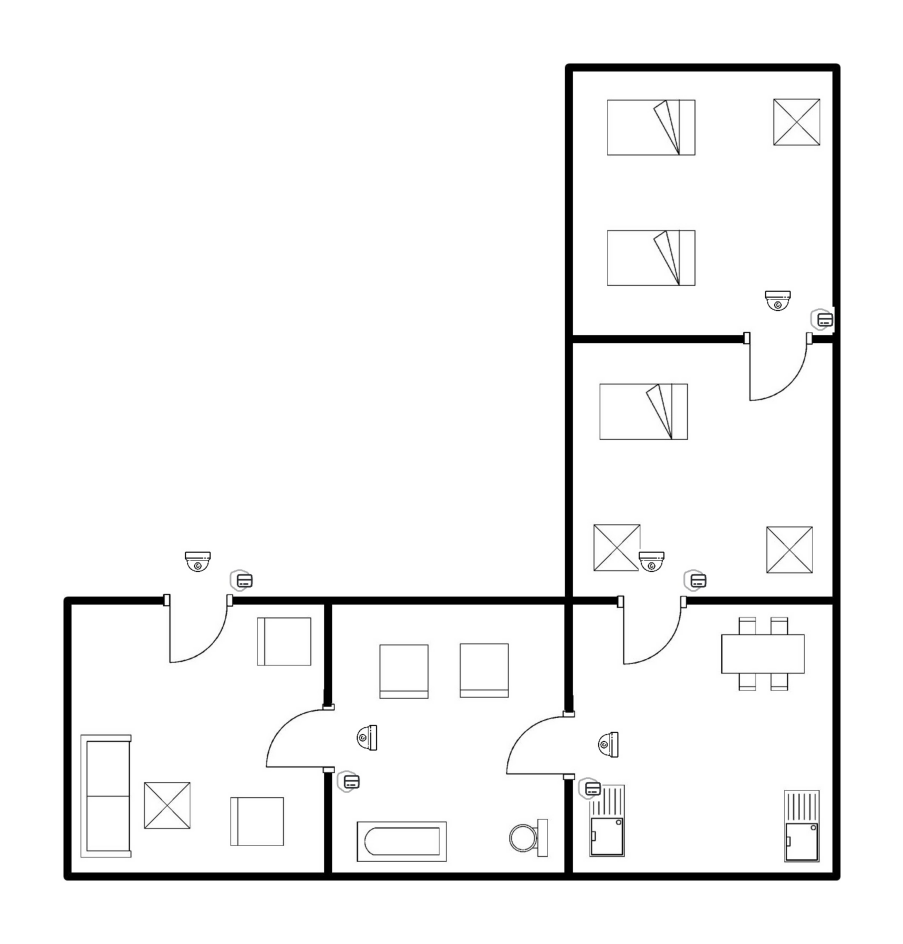

/notebooks/AccessControlPlanForFloorPlan


In [118]:
%cd /notebooks/AccessControlPlanForFloorPlan/AccessControlPlanForFloorPlan
from matplotlib import pyplot as plt
X = plt.imread("temp/Cat46_2_pred.jpg")
plt.figure(figsize=(12, 12))
plt.imshow(X)
plt.axis('off')
plt.show()
%cd /notebooks/AccessControlPlanForFloorPlan/


In [119]:
!rm -rf AccessControlPlanForFloorPlan/temp
!rm -rf AccessControlPlanForFloorPlan/.ipynb_checkpoints
!rm -rf AccessControlPlanForFloorPlan/DoorOrientationSegmentation/__pycache__/
!tar -cvzf AccessControlPlanForFloorPlan.tar.gz AccessControlPlanForFloorPlan

AccessControlPlanForFloorPlan/
AccessControlPlanForFloorPlan/requirements.txt
AccessControlPlanForFloorPlan/app.py
AccessControlPlanForFloorPlan/README.md
AccessControlPlanForFloorPlan/static/
AccessControlPlanForFloorPlan/static/cctv-svgrepo-com.jpg
AccessControlPlanForFloorPlan/static/security-card-svgrepo-com.jpg
AccessControlPlanForFloorPlan/weights/
AccessControlPlanForFloorPlan/weights/yolo_best.pt
AccessControlPlanForFloorPlan/weights/unet_best_cpu.pt
AccessControlPlanForFloorPlan/weights/unet_best_cuda.pt
AccessControlPlanForFloorPlan/weights/.ipynb_checkpoints/
AccessControlPlanForFloorPlan/DoorOrientationSegmentation/
AccessControlPlanForFloorPlan/DoorOrientationSegmentation/predict.py
AccessControlPlanForFloorPlan/DoorOrientationSegmentation/Transforms.py
AccessControlPlanForFloorPlan/DoorOrientationSegmentation/.ipynb_checkpoints/
AccessControlPlanForFloorPlan/DoorOrientationSegmentation/.ipynb_checkpoints/predict-checkpoint.py
AccessControlPlanForFloorPlan/data/
AccessCont